In [1]:
import os
import pandas as pd
import seaborn as sns
import random
from datetime import datetime

In [2]:
data_folder = '../03.clean-data/'

In [3]:
hpi = pd.read_csv(os.path.join(data_folder, 'hpi.csv'))
hpi['Date'] = pd.to_datetime(hpi['Date'])

## Aggregate Visualizations

In [4]:
# Housing Types
housing_types = hpi['Type'].unique().tolist()
housing_types

['Single-Family Attached',
 'Single-Family Detached',
 'Townhouse',
 'Apartment',
 'Composite']

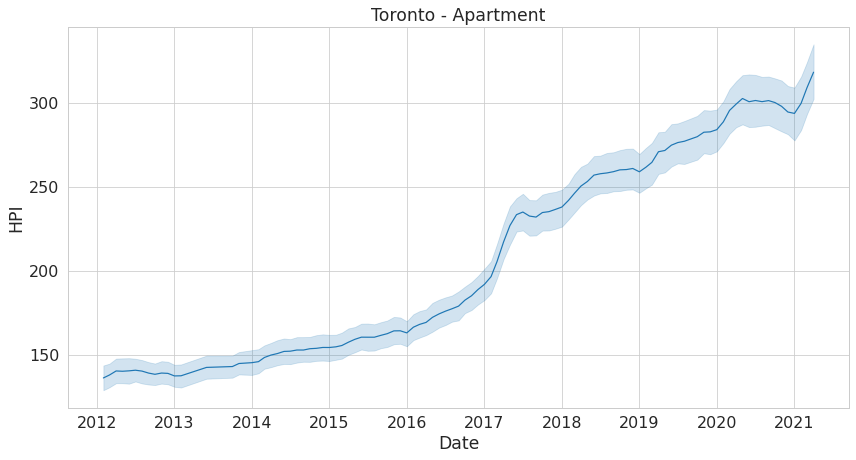

In [5]:
random_housing_type = random.choice(housing_types)
housing_type = random_housing_type
housing_type = 'Apartment'
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi[(hpi['Type'] == housing_type) & hpi['Area'].str.startswith('Toronto') & (hpi['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='HPI',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"Toronto - {housing_type}")
        fig = ax.get_figure()

## Random Area Visualization

In [6]:
areas = hpi['Area'].unique().tolist()
print(areas)

['Burlington', 'Halton Hills', 'Milton', 'Oakville', 'Brampton', 'Mississauga', 'Aurora', 'East Gwillimbury', 'Georgina', 'Markham', 'Newmarket', 'Richmond Hill', 'Vaughan', 'Whitchurch-Stouffville', 'Ajax', 'Clarington', 'Oshawa', 'Pickering', 'Scugog', 'Uxbridge', 'Whitby', 'Orangeville', 'Adjala-Tosorontio', 'Innisfil', 'New Tecumseth', 'TREB Total', 'Toronto W01', 'Toronto W02', 'Toronto W03', 'Toronto W04', 'Toronto W05', 'Toronto W06', 'Toronto W07', 'Toronto W08', 'Toronto W09', 'Toronto W10', 'Toronto C01', 'Toronto C02', 'Toronto C03', 'Toronto C04', 'Toronto C06', 'Toronto C07', 'Toronto C08', 'Toronto C09', 'Toronto C10', 'Toronto C11', 'Toronto C12', 'Toronto C13', 'Toronto C14', 'Toronto C15', 'Toronto E01', 'Toronto E02', 'Toronto E03', 'Toronto E04', 'Toronto E05', 'Toronto E06', 'Toronto E07', 'Toronto E08', 'Toronto E09', 'Toronto E10', 'Toronto E11']


In [7]:
random_area = random.choice(areas)
random_housing_type = random.choice(housing_types)
area = random_area
housing_type = random_housing_type

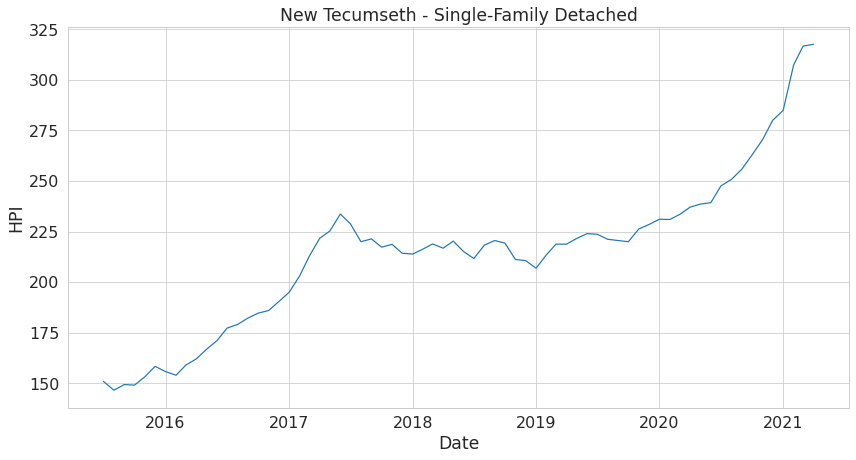

In [8]:
# housing_type = 'Single-Family Attached'
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi[(hpi['Type'] == housing_type) & (hpi['Area'] == area) & (hpi['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='HPI',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"{area} - {housing_type}")
        fig = ax.get_figure()

In [9]:
random_area = random.choice(areas)
area = random_area
area = 'TREB Total'

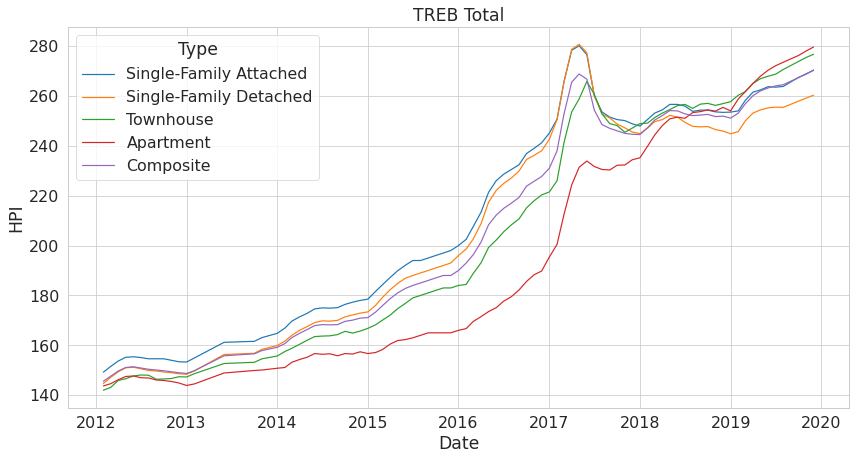

In [10]:
# housing_type = 'Single-Family Attached'
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi[(hpi['Area'] == area) & (hpi['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='HPI',
            hue='Type',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"{area}")
        fig = ax.get_figure()

## Check for NULL values

In [11]:
hpi['HPI'].isnull().sum()

1695

In [12]:
hpi[hpi['Area'].str.startswith('Toronto')]['HPI'].isnull().sum()

365

In [13]:
# Toronto areas have full data for Single-Family houses & Apartment units.
(hpi
     [hpi['Area'].str.startswith('Toronto') & (hpi['Type'].isin(['Composite', 'Single-Family Attached', 'Single-Family Detached', 'Apartment']))]
     ['HPI']
     .isnull()
     .sum()
)

0

In [14]:
hpi[hpi['Type'].str.startswith('Single-Family')]['HPI'].isnull().sum()

79

In [15]:
hpi[hpi['Type'] == 'Composite']['HPI'].isnull().sum()

3

In [16]:
hpi[hpi['HPI'].isnull() & (hpi['Type'] == 'Composite')]

,index,Area,Date,Type,HPI
8102,126,Milton,2020-12-01,Composite,NaN
8240,157,Clarington,2021-01-01,Composite,NaN
8492,150,Pickering,2021-03-01,Composite,NaN


In [17]:
hpi[hpi['HPI'].isnull() & (hpi['Type'] == 'Composite') & (~hpi['Area'].isin(['Caledon', 'King']))]

,index,Area,Date,Type,HPI
8102,126,Milton,2020-12-01,Composite,NaN
8240,157,Clarington,2021-01-01,Composite,NaN
8492,150,Pickering,2021-03-01,Composite,NaN


## Check Granularity / Check for Duplicated Data

In [18]:
len(hpi), len(hpi.drop_duplicates(['Area', 'Type', 'Date']))

(27085, 27085)

In [19]:
hpi[hpi.duplicated(['Area', 'Type', 'Date'])]

,index,Area,Date,Type,HPI
